In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import binom
from scipy.stats import chi2_contingency, mannwhitneyu, norm, t, ttest_ind

%matplotlib inline

In [2]:
np.random.seed(22)

x = np.random.binomial(n=1, p=0.7, size=15)
y = np.random.binomial(n=1, p=0.3, size=19)

x, y

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1]),
 array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]))

In [3]:
_, (a, c) = np.unique(x, return_counts=True)
_, (b, d) = np.unique(y, return_counts=True)

(a,c),(b,d)

((4, 11), (11, 8))

In [4]:
df = pd.DataFrame(data=[[a, b], [c, d]], 
                 index=["click", "no click"], 
                 columns=["A", "B"])
df # contingency table

,A,B
click,4,11
no click,11,8


In [5]:
m = df.values

m

array([[ 4, 11],
       [11,  8]], dtype=int64)

In [6]:
# Fisher's exact test

In [7]:
def hypergeom(k, K, n, N):
    """Probability mass funciton of the hypergeometric distribution."""
    return binom(K, k) * binom(N-K, n-k) / binom(N, n)


def fisher_prob(m):
    """Probability of a given observed contingency table according to Fisher's exact test."""
    ((a, b), (c ,d)) = m
    k = a
    K = a+b
    n = a+c
    N = a+b+c+d
    return hypergeom(k, K, n, N)


def fisher_probs_histogram(m):
    """Computes prob mass function histogram accroding to Fisher's exact test."""
    neg_val = -min(m[0,0], m[1,1])
    pos_val = min(m[1,0], m[1,0])
    probs = []
    for k in range(neg_val, pos_val+1):
        m1 = m + np.array([[1, -1], [-1, 1]]) * k
        probs.append(fisher_prob(m1))
    return probs


def return_contingency_tables(m):
    """Computes prob mass function histogram accroding to Fisher's exact test."""
    neg_val = -min(m[0,0], m[1,1])
    pos_val = min(m[1,0], m[1,0])
    tables_and_probs = []
    for k in range(neg_val, pos_val+1):
        m1 = m + np.array([[1, -1], [-1, 1]]) * k
        tables_and_probs.append((m1,fisher_prob(m1))) 
    return tables_and_probs

In [8]:
return_contingency_tables(m)

[(array([[ 0, 15],
         [15,  4]], dtype=int64),
  2.0883986159412966e-06),
 (array([[ 1, 14],
         [14,  5]], dtype=int64),
  9.397793771735834e-05),
 (array([[ 2, 13],
         [13,  6]], dtype=int64),
  0.0015349729827168529),
 (array([[ 3, 12],
         [12,  7]], dtype=int64),
  0.012352877813292768),
 (array([[ 4, 11],
         [11,  8]], dtype=int64),
  0.05558795015981746),
 (array([[ 5, 10],
         [10,  9]], dtype=int64),
  0.1494698215408425),
 (array([[ 6,  9],
         [ 9, 10]], dtype=int64),
  0.2491163692347375),
 (array([[ 7,  8],
         [ 8, 11]], dtype=int64),
  0.26205747932485374),
 (array([[ 8,  7],
         [ 7, 12]], dtype=int64),
  0.17470498621656916),
 (array([[ 9,  6],
         [ 6, 13]], dtype=int64),
  0.07316704550950333),
 (array([[10,  5],
         [ 5, 14]], dtype=int64),
  0.01881438313101514),
 (array([[11,  4],
         [ 4, 15]], dtype=int64),
  0.0028506641107598697),
 (array([[12,  3],
         [ 3, 16]], dtype=int64),
  0.00023755534

In [9]:
bars_h = np.array(fisher_probs_histogram(m))
bars_h

array([2.08839862e-06, 9.39779377e-05, 1.53497298e-03, 1.23528778e-02,
       5.55879502e-02, 1.49469822e-01, 2.49116369e-01, 2.62057479e-01,
       1.74704986e-01, 7.31670455e-02, 1.88143831e-02, 2.85066411e-03,
       2.37555343e-04, 9.67419947e-06, 1.53558722e-07, 5.38802532e-10])

In [10]:
fisher_prob(m)

0.05558795015981746

- Fisher's exact test: p-val = 9.1%


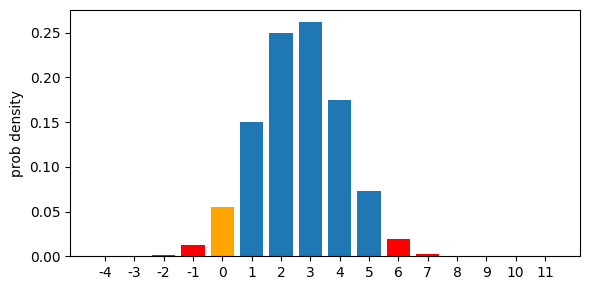

In [11]:
f, ax = plt.subplots(figsize=(6, 3))
ii = np.arange(len(bars_h))
ax.bar(ii, bars_h)
idxs = bars_h <= fisher_prob(m)
ax.bar(ii[idxs], bars_h[idxs], color='r') #  These bars represent outcomes that are as extreme as, or more extreme than, the observed data
ax.set_ylabel("prob density")
p_val = bars_h[idxs].sum()
neg_val = -min(m[0,0], m[1,1])
pos_val = min(m[1,0], m[1,0])
ax.bar(ii[-neg_val], bars_h[-neg_val], color='orange') # the element at index -neg_val corresponds to the case where k is zero, i.e., the observed data. So, ii[-neg_val] gives you the index in bars_h that corresponds to the observed data, and bars_h[-neg_val] gives you the probability of the observed data.

ax.set_xticks(ii)
ax.set_xticklabels(np.arange(neg_val, pos_val+1))
f.tight_layout()
print(f"- Fisher's exact test: p-val = {100*p_val:.1f}%")

In [12]:
# Pearson's chi-squared test

# Fisher's exact test has the important advantage of computing exact p-values. But if we have a large sample size, it may be computationally inefficient. In this case, we can use Pearson's chi-squared test to compute an approximate p-value.


In [13]:
# The chi2_contingency function actually returns four values: the test statistic, the p-value, the degrees of freedom, and the expected frequencies.

chi2_val, p_val, degr_freed, exp_freq = chi2_contingency(m, correction=False)

print("- Pearson's chi-squared t-test:")
print(f"   - χ2 value: {chi2_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")

print ('degr_freed',degr_freed)

# If “click” and “no click” are independent of “A” and “B”, then we would expect the proportion of “click” and “no click” to be the same for both “A” and “B”. So, for “A”, we would expect “click” to be (15/34)*15 = 6.61764706 and “no click” to be (19/34)*15 = 8.38235294. Similarly for “B”, “click” would be (15/34)*19 = 8.38235294 and “no click” would be (19/34)*19 = 10.61764706.

print ('exp_freq',exp_freq)

- Pearson's chi-squared t-test:
   - χ2 value: 3.316
   - p-value: 6.9%
degr_freed 1
exp_freq [[ 6.61764706  8.38235294]
 [ 8.38235294 10.61764706]]


In [14]:
# Let's now consider the case of a continuous metrics, e.g. average revenue per user. We randomly show visitors of our website one of two possible layouts of products for sale, and based on how much revenue each user generated in a month we want to determine whether our data significantly contradict the hypothesis that the two website layouts are equivalently efficient

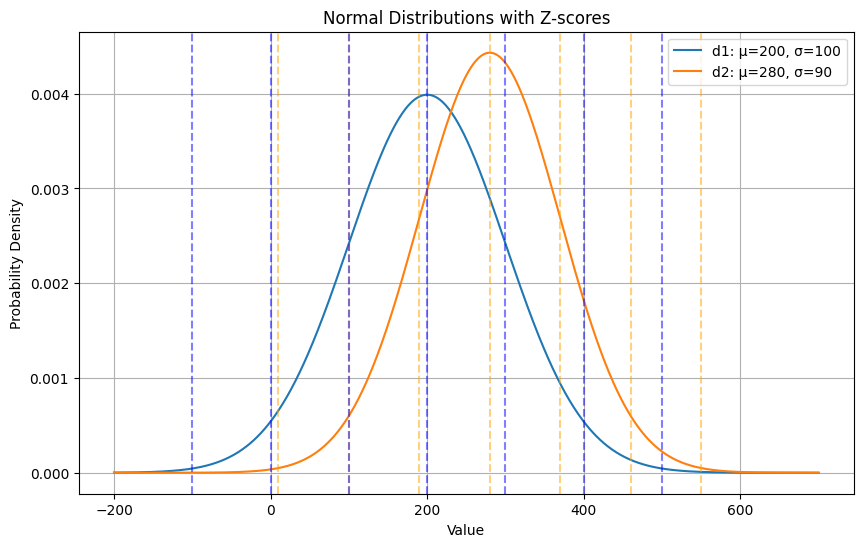

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# Distributions
d1 = norm(loc=200, scale=100)
d2 = norm(loc=280, scale=90)

# Generate data
x = np.linspace(-200, 700, 1000)
y1 = d1.pdf(x)
y2 = d2.pdf(x)

# Calculate Z-scores
z1 = (x - d1.mean()) / d1.std()
z2 = (x - d2.mean()) / d2.std()

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y1, label='d1: μ=200, σ=100')
plt.plot(x, y2, label='d2: μ=280, σ=90')

# Add Z-score lines
for z in range(-3, 4):  # Z-scores from -3 to 3
    plt.axvline(x=d1.mean() + z * d1.std(), color='blue', linestyle='--', alpha=0.5)
    plt.axvline(x=d2.mean() + z * d2.std(), color='orange', linestyle='--', alpha=0.5)

plt.legend()
plt.title('Normal Distributions with Z-scores')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


In [16]:
# Parameters
n_x, n_y = 17, 14

disc = 50

# Generate random variates: d1.rvs(size=n_x) and d2.rvs(size=n_y) generate n_x and n_y random variates (random samples) from d1 and d2 respectively. These are continuous values.
# Discretize the variates: The continuous variates are then discretized by dividing them by disc (which is set to 50), converting them to integers (which effectively rounds them down to the nearest integer), and then multiplying them by disc again. This results in the variates being rounded down to the nearest multiple of disc.

x = (d1.rvs(size=n_x) / disc).astype(int) * disc
y = (d2.rvs(size=n_y) / disc).astype(int) * disc

x, y

(array([200, 150, 250, 350, 150, 150, 350, 250, 150, 250, 150, 150, 200,
          0,   0, 100,  50]),
 array([300, 150, 150, 400, 250, 250, 150, 200, 250, 150, 300, 200, 250,
        200]))

- Observations:
  - Version A: = [200 150 250 350 150 150 350 250 150 250 150 150 200   0   0 100  50]
  - Version B: = [300 150 150 400 250 250 150 200 250 150 300 200 250 200]

- Distribution plot:


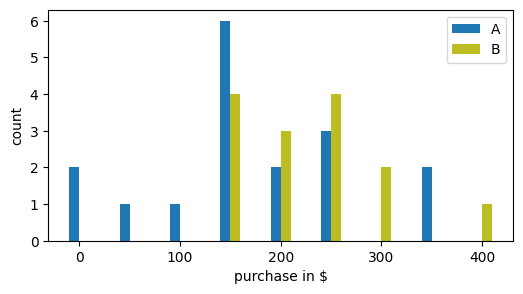

In [17]:
print("- Observations:")
print(f"  - Version A: = {x}")
print(f"  - Version B: = {y}")
print("")
print(f"- Distribution plot:")
f, ax = plt.subplots(figsize=(6, 3))
for i, (x_, l_, c_) in enumerate(zip([x, y], ["A", "B"], ["tab:blue", "tab:olive"])):
    v, c = np.unique(x_, return_counts=True)
    ax.bar(v-5+10*i, c, width=10, label=l_, color=c_)

ax.set_xlabel("purchase in $")
ax.set_ylabel("count")
ax.legend();

In [18]:
# This function, plot_pval, is designed to plot a given probability distribution and highlight the areas under the curve that correspond to the p-value for a given test statistic (t_val).

def plot_pval(distribution, t_val, xlims=(-5, 5), ylims=(0, 0.5)):
    xxx = np.linspace(*xlims, 1000)
    f, ax = plt.subplots(figsize=(4,3))
    ax.plot(xxx, distribution.pdf(xxx))
    ax.set_ylim(ylims)
    # These below lines add a vertical line and a point at the location of the test statistic (t_val) on the distribution.
    ax.vlines(t_val, 0, distribution.pdf(t_val), color='orange')
    ax.plot(t_val, distribution.pdf(t_val), 'o', color='orange')
    # These lines fill the area under the curve to the left of t_val, which represents the p-value for a one-tailed test.
    xp = xxx <= t_val
    ax.fill_between(xxx[xp], xxx[xp] * 0, distribution.pdf(xxx[xp]), color='r')
    # These lines fill the area under the curve to the right of -t_val, which represents the p-value for a two-tailed test.
    xp = xxx >= -t_val
    ax.fill_between(xxx[xp], xxx[xp] * 0, distribution.pdf(xxx[xp]), color='r')
    ax.set_ylabel("prob denisty")
    f.tight_layout()
    return f, ax

In [19]:
# Known standard deviations (we assume to know the standard deviation of the population=
s_x = 100
s_y = 90

x, y

s_x_sample = np.std(x)
s_y_sample = np.std(y)

n_x = len(x)
n_y = len(y)

x, y, s_x, s_y, n_x, n_y

(array([200, 150, 250, 350, 150, 150, 350, 250, 150, 250, 150, 150, 200,
          0,   0, 100,  50]),
 array([300, 150, 150, 400, 250, 250, 150, 200, 250, 150, 300, 200, 250,
        200]),
 100,
 90,
 17,
 14)

- Z-test:
   - z value: -1.697
   - p-value: 9.0%


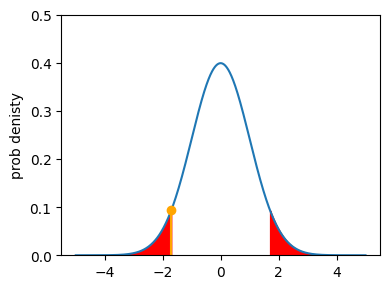

In [20]:
# The Z-test can be applied under the following assumptions.
# The observations are normally distributed (or the sample size is large).
# The sampling distributions have known variance σ_X and σ_Y.
# Under the above assumptions, the Z-test relies on the observation that the following Z statistic has a standard normal distribution.


# Z value (z-statistic)
z_val = (x.mean() - y.mean()) / np.sqrt(s_x**2/n_x + s_y**2/n_y)

# Test statistic distribution under null hypothesis H0
# The null hypothesis (H0) for a Z-test is typically that there is no difference between the population means. Under this hypothesis, the Z value follows a standard normal distribution
stat_distrib = norm(loc=0, scale=1)

# p-value
# calculated by finding the cumulative distribution function (CDF) of the Z value in the standard normal distribution, and then multiplying by 2 to get a two-tailed p-value
p_val = stat_distrib.cdf(z_val) * 2

print("- Z-test:")
print(f"   - z value: {z_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);

- Student's t-test:
   - nu: 29.000
   - t value: -1.789
   - p-value: 8.4%


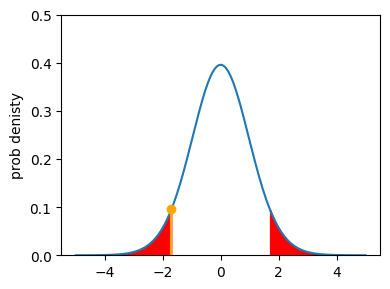

In [21]:
# In most cases, the variances of the sampling distributions are unknown, so that we need to estimate them. Student's t-test can then be applied under the following assumptions.
# The observations are normally distributed (or the sample size is large).
# The sampling distributions have "similar" variances σX ≈ σY.
# Under the above assumptions, Student's t-test relies on the observation that the following t statistic has a Student's t distribution.

# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(x, ddof=1))
s_y = np.sqrt(np.var(y, ddof=1))

# Pooled variance
s_p = np.sqrt(((n_x-1) * s_x**2 +
               (n_y-1) * s_y**2)
              / (n_x + n_y - 2))

# Test statistic distribution under null hypothesis H0
dofs = n_x + n_y - 2
stat_distrib = t(df=dofs, loc=0, scale=1)

# t value
t_val = (x.mean() - y.mean()) / (s_p * np.sqrt(1/n_x + 1/n_y))

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Student's t-test:")
print(f"   - nu: {dofs:.3f}")
print(f"   - t value: {t_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);

- Welch' t-test:
   - nu: 28.505
   - t value: -1.848
   - p-value: 7.5%


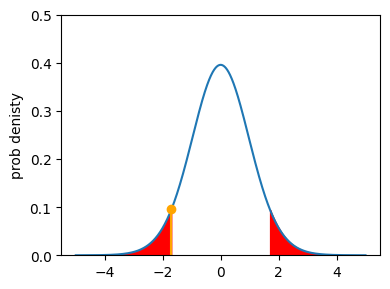

In [22]:
# In most cases Student's t test can be effectively applied with good results. However, it may rarely happen that its second assumption (similar variance of the sampling distributions) is violated. In that case, we cannot compute a pooled variance and rather than Student's t test we should use Welch's t-test.
# This test operates under the same assumptions of Student's t-test but removes the requirement on the similar variances. Then, we can use a slightly different t statistic, which also has a Student's t distribution, but with a different number of degrees of freedom ν.

# Sample variances (w. Bessel correction)
s_x = np.sqrt(np.var(x, ddof=1))
s_y = np.sqrt(np.var(y, ddof=1))

# Denominator (not a pooled variance!)
s_d = np.sqrt(s_x**2/n_x + s_y**2/n_y)
    
    
# Test statistic distribution under null hypothesis H0
dofs = s_d**4 / ((s_x**2/n_x)**2/(n_x-1) +
                 (s_y**2/n_y)**2/(n_y-1))
stat_distrib = t(df=dofs, loc=0, scale=1)

# t value
t_val = (x.mean() - y.mean()) / s_d

# p-value
p_val = stat_distrib.cdf(t_val) * 2

print("- Welch' t-test:")
print(f"   - nu: {dofs:.3f}")
print(f"   - t value: {t_val:.3f}")
print(f"   - p-value: {p_val*100:.1f}%")
plot_pval(stat_distrib, z_val);

In [23]:
# This test makes the least assumptions about the nature of our observations, as it is fully nonparametric. The idea of Mann-Whitney U test is to compute the U statistic.
# The values of this test statistic are tabulated, as the distribution can be computed under the null hypothesis that, for random samples X and Y from the two populations, the probability P(X < Y) is the same as P(X > Y).

# The use_continuity parameter is set to False, which means that a continuity correction is not applied in the computation of the p-value. The alternative parameter is set to "two-sided", which means that the test is two-tailed. This means that the alternative hypothesis is that the distributions of the two groups are not equal, without specifying which one is greater.
mwu = mannwhitneyu(x, y, use_continuity=False, alternative="two-sided")

print("- Mann-Whitney U test:")
print(f"   - U value: {mwu.statistic:.3f}")
print(f"   - p-value: {mwu.pvalue*100:.1f}%")

- Mann-Whitney U test:
   - U value: 76.000
   - p-value: 8.0%


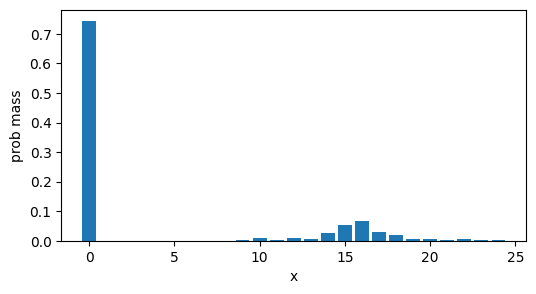

In [24]:
# Tests that rely on the assumption of normally distributed test statistics can also be applied if the original sampling distribution is highly non-normal!
# Indeed, thanks to the Central Limit Theorem, the distribution of the test statistic is asymptotically normal as the sample size increases.
# This is very useful in the common case of A/B tests that produce observations that are zero-inflated and/or multimodal.

p = np.array([245, 0, 0, 0, 0, 0, 0, 0, 0,  1, 3, 1, 3, 2, 9, 18, 22, 10, 6, 2, 2, 1, 2, 1, 1])
a = np.arange(len(p))
p = p / p.sum()

f, ax = plt.subplots(figsize=(6, 3))
ax.bar(a, p)
ax.set_ylabel("prob mass")
ax.set_xlabel("x");

In [25]:
#calculating expected value , or mean, of the distribution
outcomes = np.arange(len(p))
loc = (p*outcomes).sum()

print([(out, prob) for (out, prob) in zip(outcomes, p)])
loc


[(0, 0.7446808510638298), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.00303951367781155), (10, 0.00911854103343465), (11, 0.00303951367781155), (12, 0.00911854103343465), (13, 0.0060790273556231), (14, 0.02735562310030395), (15, 0.0547112462006079), (16, 0.0668693009118541), (17, 0.030395136778115502), (18, 0.0182370820668693), (19, 0.0060790273556231), (20, 0.0060790273556231), (21, 0.00303951367781155), (22, 0.0060790273556231), (23, 0.00303951367781155), (24, 0.00303951367781155)]


4.036474164133739

array([0.74468085, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00303951,
       0.00911854, 0.00303951, 0.00911854, 0.00607903, 0.02735562,
       0.05471125, 0.0668693 , 0.03039514, 0.01823708, 0.00607903,
       0.00607903, 0.00303951, 0.00607903, 0.00303951, 0.00303951])

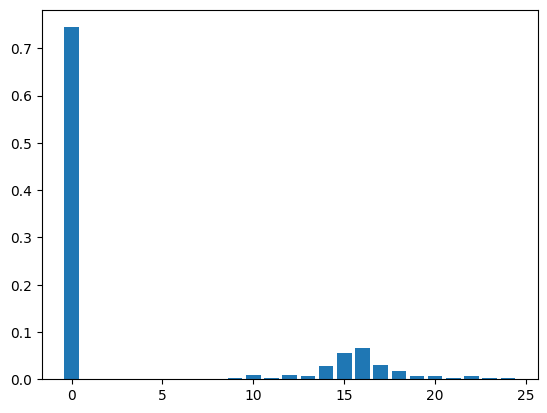

In [26]:
x_axis = np.arange(len(p))
plt.bar(x_axis, p)

p

array([5.54549570e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.52693526e-03, 1.35808058e-02, 4.52693526e-03,
       1.35808058e-02, 9.05387053e-03, 4.07424174e-02, 8.14848348e-02,
       9.95925758e-02, 4.52693526e-02, 2.71708502e-02, 9.10930239e-03,
       9.15549561e-03, 4.63779899e-03, 9.26635933e-03, 4.85952643e-03,
       5.47851553e-03, 1.68143310e-03, 2.27270628e-03, 2.40204728e-03,
       3.18733197e-03, 4.61932170e-03, 7.52025573e-03, 9.44189355e-03,
       9.12777968e-03, 6.63334596e-03, 4.58236713e-03, 2.90093403e-03,
       2.27270628e-03, 1.86620597e-03, 1.75534225e-03, 1.29341008e-03,
       8.86909766e-04, 4.06500309e-04, 2.30966085e-04, 1.10863721e-04,
       9.23864340e-05, 5.54318604e-05, 4.61932170e-05, 1.84772868e-05,
       9.23864340e-06])

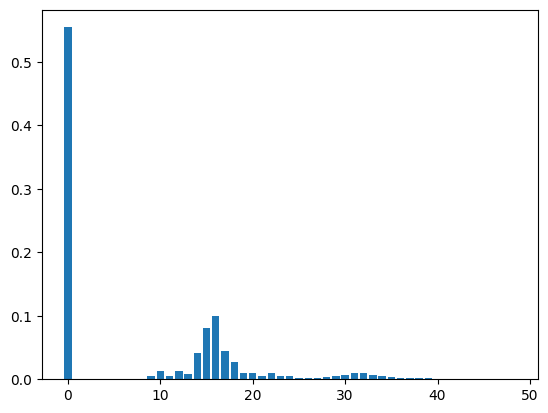

In [27]:
p_p = np.convolve(p,p)
x_axis = np.arange(len(p_p))
plt.bar(x_axis, p_p)

p_p

array([1.20102707e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.35322696e-04, 2.20596809e-03, 7.35322696e-04,
       2.20596809e-03, 1.47064539e-03, 6.61790427e-03, 1.32358085e-02,
       1.61770993e-02, 7.35322696e-03, 4.43294540e-03, 1.59670071e-03,
       1.70174681e-03, 9.87433335e-04, 1.95385745e-03, 1.49165461e-03,
       2.89927234e-03, 3.82367802e-03, 5.16826809e-03, 5.46276876e-03,
       7.25152519e-03, 1.05157577e-02, 1.71215709e-02, 2.15048660e-02,
       2.08206514e-02, 1.52198792e-02, 1.07360544e-02, 7.15316774e-03,
       6.01996069e-03, 5.46013647e-03, 5.91611722e-03, 6.11985234e-03,
       7.15629786e-03, 8.05060216e-03, 9.42699499e-03, 1.09138363e-02,
       1.36886767e-02, 1.75470482e-02, 2.17106089e-02, 2.35279505e-02,
       2.22885328e-02, 1.87617479e-02, 1.51202390e-02, 1.22364517e-02,
       1.07147008e-02, 9.98181885e-03, 9.83543136e-03, 9.83549796e-03,
      

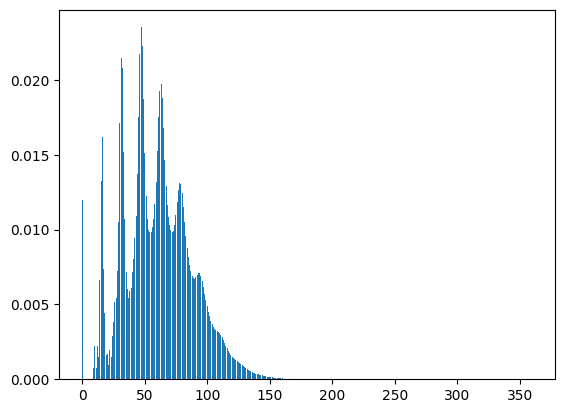

In [28]:
p_p_p = np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,np.convolve(p,p))))))))))))))
x_axis = np.arange(len(p_p_p))
plt.bar(x_axis, p_p_p)

p_p_p

<BarContainer object of 1225 artists>

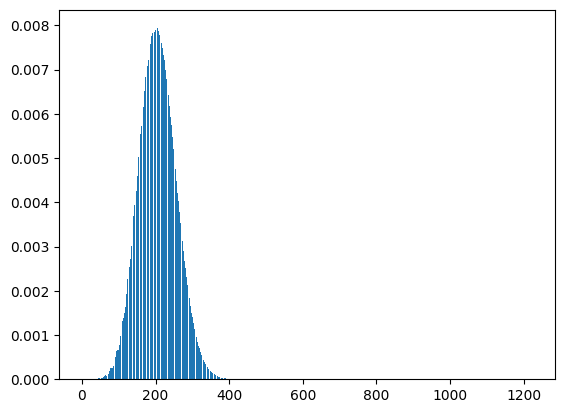

In [29]:
n_times = 50
p_p = p
for i in range(n_times):
    p_p = np.convolve(p_p, p)
    
x_axis = np.arange(len(p_p))
plt.bar(x_axis, p_p)

In [30]:
p

array([0.74468085, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00303951,
       0.00911854, 0.00303951, 0.00911854, 0.00607903, 0.02735562,
       0.05471125, 0.0668693 , 0.03039514, 0.01823708, 0.00607903,
       0.00607903, 0.00303951, 0.00607903, 0.00303951, 0.00303951])

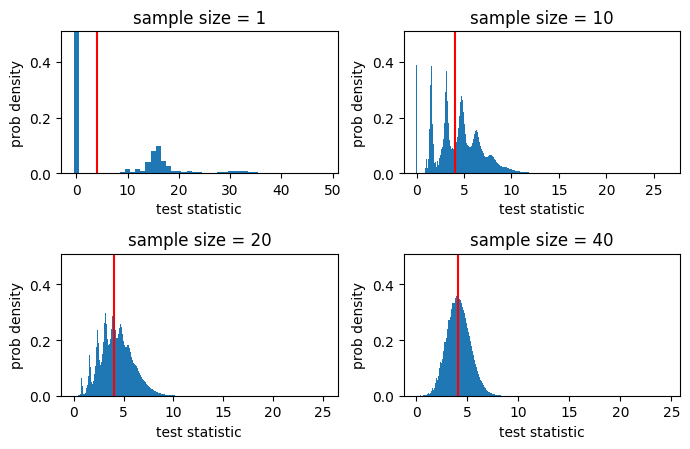

In [31]:
nn = [1, 10, 20, 40] # list of sample size
f, axx = plt.subplots(2, 2, figsize=(3.5*2, 2.3*2))    

for i, n in enumerate(nn):
    r, c = divmod(i, 2)        
    x = p
    ax = axx[r, c]
    for _ in range(n):
        x = np.convolve(x, p) # convolving a distribution with itself is equivalent to summing n independent random variables that follow this distribution. So this operation is simulating the distribution of the sum of n independent random variables.

    # The x-coordinates are scaled by 1/n to represent the average outcome (since we’re summing n variables), and the y-coordinates are scaled by n to ensure that the total probability remains 1.
    ax.bar(np.arange(len(x))/n, x*n, width=1/n)
    ax.set_ylim([0, 0.51])
    ax.vlines(loc, 0, 0.51, 'r') # drawing a vertical red line at the expected value loc of the original distribution.
    ax.set_xlabel("test statistic")
    ax.set_ylabel("prob density")
    ax.set_title(f"sample size = {n}")

f.tight_layout()

In [32]:
x

array([5.63349150e-006, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 9.42747556e-007, 2.82824267e-006, 9.42747556e-007,
       2.82824267e-006, 1.88549511e-006, 8.48472801e-006, 1.69694560e-005,
       2.07404462e-005, 9.42747556e-006, 5.73344432e-006, 2.34724902e-006,
       2.73204394e-006, 1.86625537e-006, 3.65555175e-006, 3.71327099e-006,
       8.86952293e-006, 1.40065351e-005, 1.89319101e-005, 2.00134194e-005,
       2.65876014e-005, 3.86019982e-005, 6.28651242e-005, 7.90196003e-005,
       7.67337614e-005, 5.67429585e-005, 4.16385799e-005, 3.02781773e-005,
       2.82915374e-005, 2.89130346e-005, 3.57759502e-005, 4.57213755e-005,
       6.39003857e-005, 8.17645224e-005, 9.98878164e-005, 1.18407528e-004,
       1.49576337e-004, 1.93163714e-004, 2.39941253e-004, 2.61775297e-004,
       2.50903035e-004, 2.16827499e-004, 1.83778516e-004, 1.61167265e-004,
       1.56307055e-004, 1